# Evaluation of the RAG pipeline

##### I am evaluating different Retrieval-Augmented Generation (RAG) pipelines to find the best strategies that provide the most effective answers. I used syntetic data generated with RAGAS and used the given test data for evaluation

In [1]:
import sys
import pandas as pd
sys.path.insert(1, '/home/jabez/week_11/Contract-Advisor-RAG/scripts')
import data_processing
import pipeline
import evaluation

file_path = '/home/jabez/week_11/Contract-Advisor-RAG/data/Raptor Contract.docx'

/home/jabez/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Load and process the document
doc = data_processing.doc_loader(file_path)
vector = data_processing.text_splitter(doc)
retriever = vector.as_retriever(search_type="similarity", search_kwargs={"k": 6})

#### Pipeline1. Simple RAG pipeline


#### Testing with Syntetic Data

In [17]:
# importing the test data that was created earlier using RAGAS
test_data = pd.read_csv("/home/jabez/week_11/Contract-Advisor-RAG/test_data/test_data.csv")
test_data.head(3) 

,question,contexts,ground_truth,evolution_type,metadata,episode_done
0,What is the ownership status of the Equity Int...,"[' under, or result in termination of, or acce...",Such Seller is the record and beneficial owner...,simple,[{'source': '/home/jabez/week_11/Contract-Advi...,True
1,"What is the significance of the ""Matters of Co...",['(b)\n\nCertain Matters of Construction.\n\nT...,The significance of the 'Matters of Constructi...,simple,[{'source': '/home/jabez/week_11/Contract-Advi...,True
2,"What is the definition of ""Liability"" in the g...",[' or under the authority or funding of any Go...,"“Liability” means, with respect to any Person,...",simple,[{'source': '/home/jabez/week_11/Contract-Advi...,True


In [21]:
# Adding answer to the test data using the simple RAG pipeline
dataset_simple_pipeline = evaluation.adding_answer_to_testdata(test_data, pipeline.simple_pipeline, vector, retriever)

In [22]:
# Evaluating the test data using metrics from RAGAS
simple_pipeline_evaluation_result = evaluation.ragas_evaluator(dataset_simple_pipeline)

Evaluating: 100%|██████████| 36/36 [00:26<00:00,  1.38it/s]


In [7]:
# Saving the simple pipeline evaluation result to CSV
simple_pipeline_evaluation_result.to_csv("/home/jabez/week_11/Contract-Advisor-RAG/test_data/simple_pipeline_evaluation_result.csv", index=False)

In [2]:
# Importing the simple pipeline evaluation result that created earlier
simple_pipeline_evaluation_result = pd.read_csv("/home/jabez/week_11/Contract-Advisor-RAG/test_data/simple_pipeline_evaluation_result.csv")

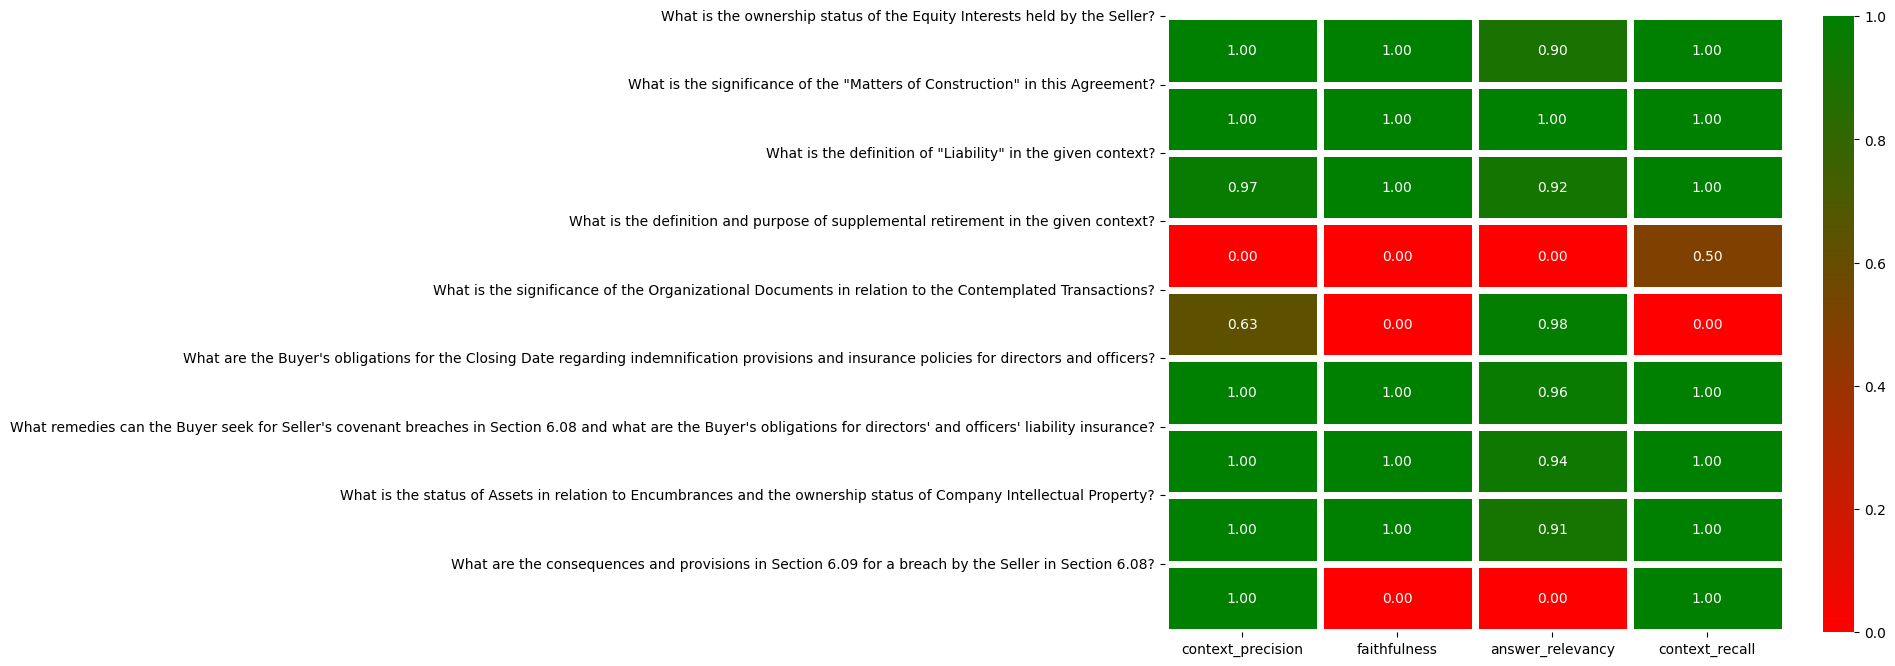

In [23]:
# Heatmap for the evaluation for visualization
evaluation.heatmap_plot(simple_pipeline_evaluation_result)

#### Testing with the given data

In [4]:
generated_test_df = pd.read_csv("/home/jabez/week_11/Contract-Advisor-RAG/test_data/generated_test_data.csv")

In [5]:
generated_test_df.head(2)

,question,ground_truth
0,Under what circumstances and to what extent th...,"Except in the case of fraud, the Sellers have ..."
1,How much is the escrow amount?,"The escrow amount is equal to $1,000,000."


In [8]:
given_testdata_for_simple_pipeline = evaluation.adding_answer_to_testdata(generated_test_df, pipeline.simple_pipeline, vector, retriever)

/home/jabez/.local/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [9]:
simple_pipeline_evaluation_result_for_given_dataset = evaluation.ragas_evaluator(given_testdata_for_simple_pipeline)

Evaluating: 100%|██████████| 52/52 [00:26<00:00,  1.94it/s]


In [10]:
simple_pipeline_evaluation_result_for_given_dataset

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall
0,Under what circumstances and to what extent th...,The Sellers are responsible for a breach of re...,[Liability. The Sellers’ Representative shall...,"Except in the case of fraud, the Sellers have ...",0.679167,1.00,0.987715,0.0
1,How much is the escrow amount?,"The escrow amount is $1,000,000.","[Escrow., Securityholders in accordance with t...","The escrow amount is equal to $1,000,000.",0.710000,1.00,0.982518,1.0
2,Is escrow amount grete then the Retention Amou...,The information is not available in the provid...,"[Escrow., Securityholders in accordance with t...",No.,0.500000,0.00,0.000000,0.0
3,What is the purpose of the escrow?,The purpose of the escrow is to hold the Escro...,"[Escrow., At Closing, Buyer will deposit the E...",To serve as a recourse of the Buyer in case of...,0.645833,1.00,0.993213,1.0
4,May the Escrow Amount serve as a recourse for ...,The information is not available in the provid...,[Recovery from the Escrow Amount shall constit...,No,0.950000,0.00,0.000000,0.0
5,Are there any conditions to the closing?,"Yes, there are conditions to the closing as de...",[No Acquired Company will be required to inclu...,"No, as the signing and closing are simultaneous.",0.566667,0.75,0.907833,1.0
6,Are Change of Control Payments considered a Se...,"Yes, Change of Control Payments are considered...",[“Seller Transaction Expenses” means all costs...,Yes.,1.000000,1.00,1.000000,1.0
7,Would the aggregate amount payable by the Buye...,"Yes, the aggregate amount payable by the Buyer...",[Purchase Price Adjustment. If any of the Clo...,Yes.,1.000000,1.00,0.984329,1.0
8,Does the Buyer need to pay the Employees Closi...,"No, the Buyer does not need to pay the Employe...",[Payments of Employee Closing Bonus. Prior to ...,No.,0.722222,1.00,1.000000,0.5
9,Does any of the Sellers provide a representati...,"Yes, the Sellers provide a representation with...","[Cooperation on Tax Matters. The Buyer, the A...",No. Only the Company provides such a represent...,0.966667,0.50,0.957364,1.0


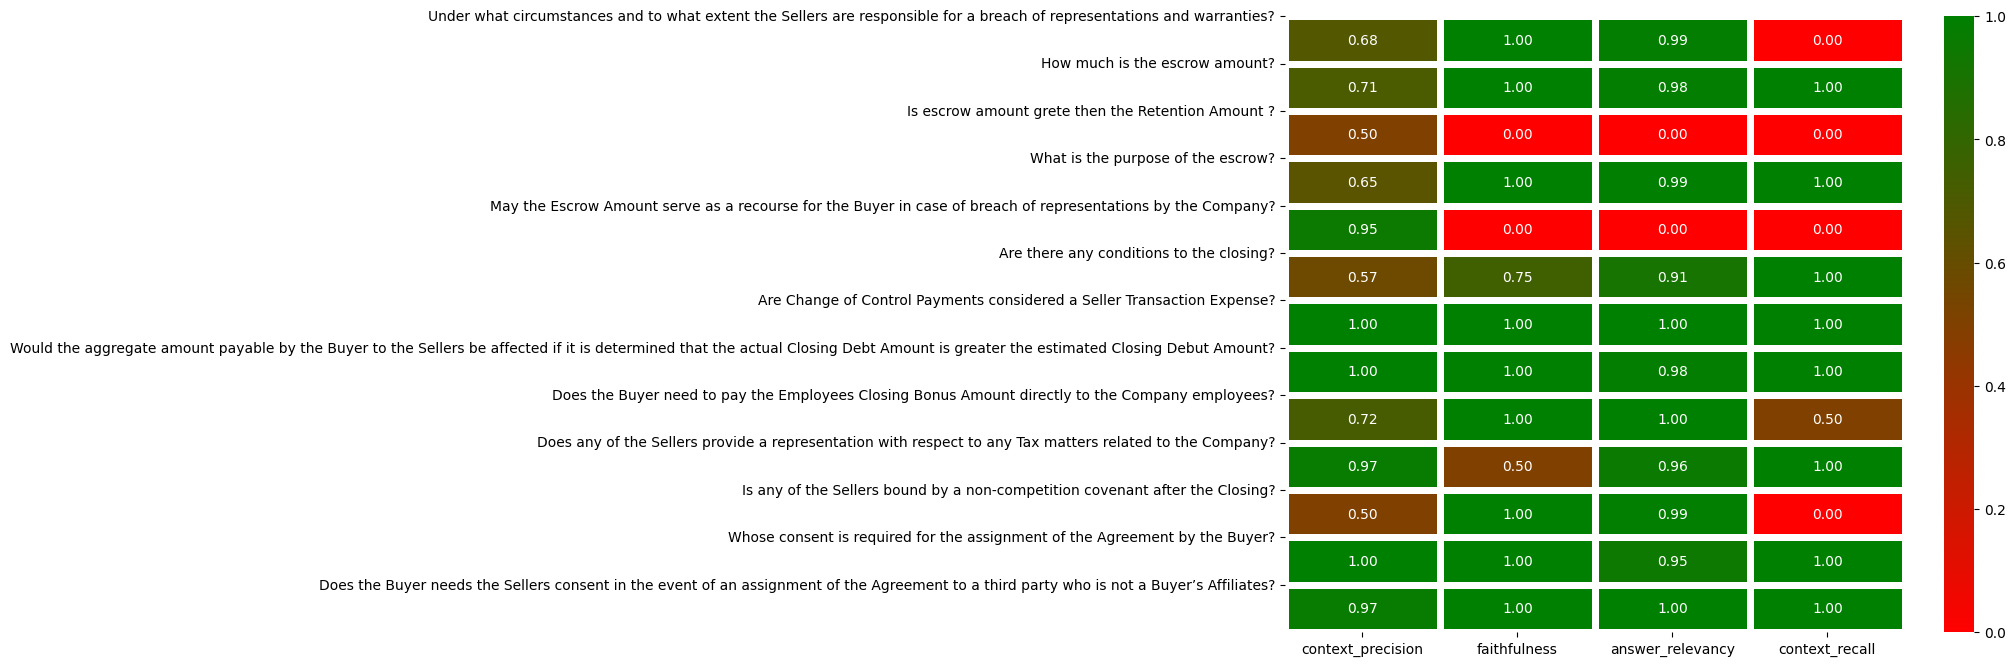

In [11]:
evaluation.heatmap_plot(simple_pipeline_evaluation_result_for_given_dataset)

#### Pipeline2. Multiquery RAG 

In [14]:
# Adding answer to the test data using the simple RAG pipeline
dataset_multiquery_pipeline = evaluation.adding_answer_to_testdata(test_data, pipeline.multi_query_pipeline, vector, retriever)

/home/jabez/.local/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


In [15]:
# Evaluating the test data using metrics from RAGAS
multiquery_pipeline_evaluation_result = evaluation.ragas_evaluator(dataset_multiquery_pipeline)

Evaluating: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]


In [16]:
multiquery_pipeline_evaluation_result.to_csv("/home/jabez/week_11/Contract-Advisor-RAG/test_data/multiquery_pipeline_evaluation_result.csv", index=False)

In [38]:
data = {'question':[], 'answer':[], 'contexts':[], 'ground_truth':ground_truth}
for query in questions:
    data['question'].append(query)
    # Generate the chatbot response
    data['answer'].append(pipeline.chatbot(vector,query))
    data['contexts'].append([doc.page_content for doc in retriever.get_relevant_documents(query)])
dataset = Dataset.from_dict(data)

In [40]:
result = evaluate(
    dataset = dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
    ],
)

result
evaluation_result = result.to_pandas()

Evaluating: 100%|██████████| 52/52 [00:25<00:00,  2.06it/s]


In [41]:
evaluation_result

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall
0,Under what circumstances and to what extent th...,The Sellers are responsible for a breach of re...,[Liability. The Sellers’ Representative shall...,"Except in the case of fraud, the Sellers have ...",0.533333,0.5,0.987786,0.0
1,How much is the escrow amount?,"The escrow amount is $1,000,000.","[Escrow., Securityholders in accordance with t...","The escrow amount is equal to $1,000,000.",0.710000,1.0,0.982518,1.0
2,Is escrow amount grete then the Retention Amou...,The information is not available in the provid...,"[Escrow., Securityholders in accordance with t...",No.,0.466667,0.0,0.000000,0.0
3,What is the purpose of the escrow?,The purpose of the escrow is to hold the Escro...,"[Escrow., At Closing, Buyer will deposit the E...",To serve as a recourse of the Buyer in case of...,0.710000,1.0,1.000000,1.0
4,May the Escrow Amount serve as a recourse for ...,The information is not available in the provid...,[Recovery from the Escrow Amount shall constit...,No,0.950000,0.0,0.000000,0.0
5,Are there any conditions to the closing?,"Yes, there are conditions to the closing as me...",[No Acquired Company will be required to inclu...,"No, as the signing and closing are simultaneous.",0.566667,1.0,0.961012,1.0
6,Are Change of Control Payments considered a Se...,"Yes, Change of Control Payments are considered...",[“Seller Transaction Expenses” means all costs...,Yes.,0.916667,1.0,1.000000,1.0
7,Would the aggregate amount payable by the Buye...,"Yes, the aggregate amount payable by the Buyer...",[Purchase Price Adjustment. If any of the Clo...,Yes.,1.000000,1.0,0.984329,1.0
8,Does the Buyer need to pay the Employees Closi...,"No, the Buyer does not need to pay the Employe...",[Payments of Employee Closing Bonus. Prior to ...,No.,0.916667,1.0,1.000000,0.5
9,Does any of the Sellers provide a representati...,"No, none of the Sellers provide a representati...","[Cooperation on Tax Matters. The Buyer, the A...",No. Only the Company provides such a represent...,0.966667,0.0,0.000000,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

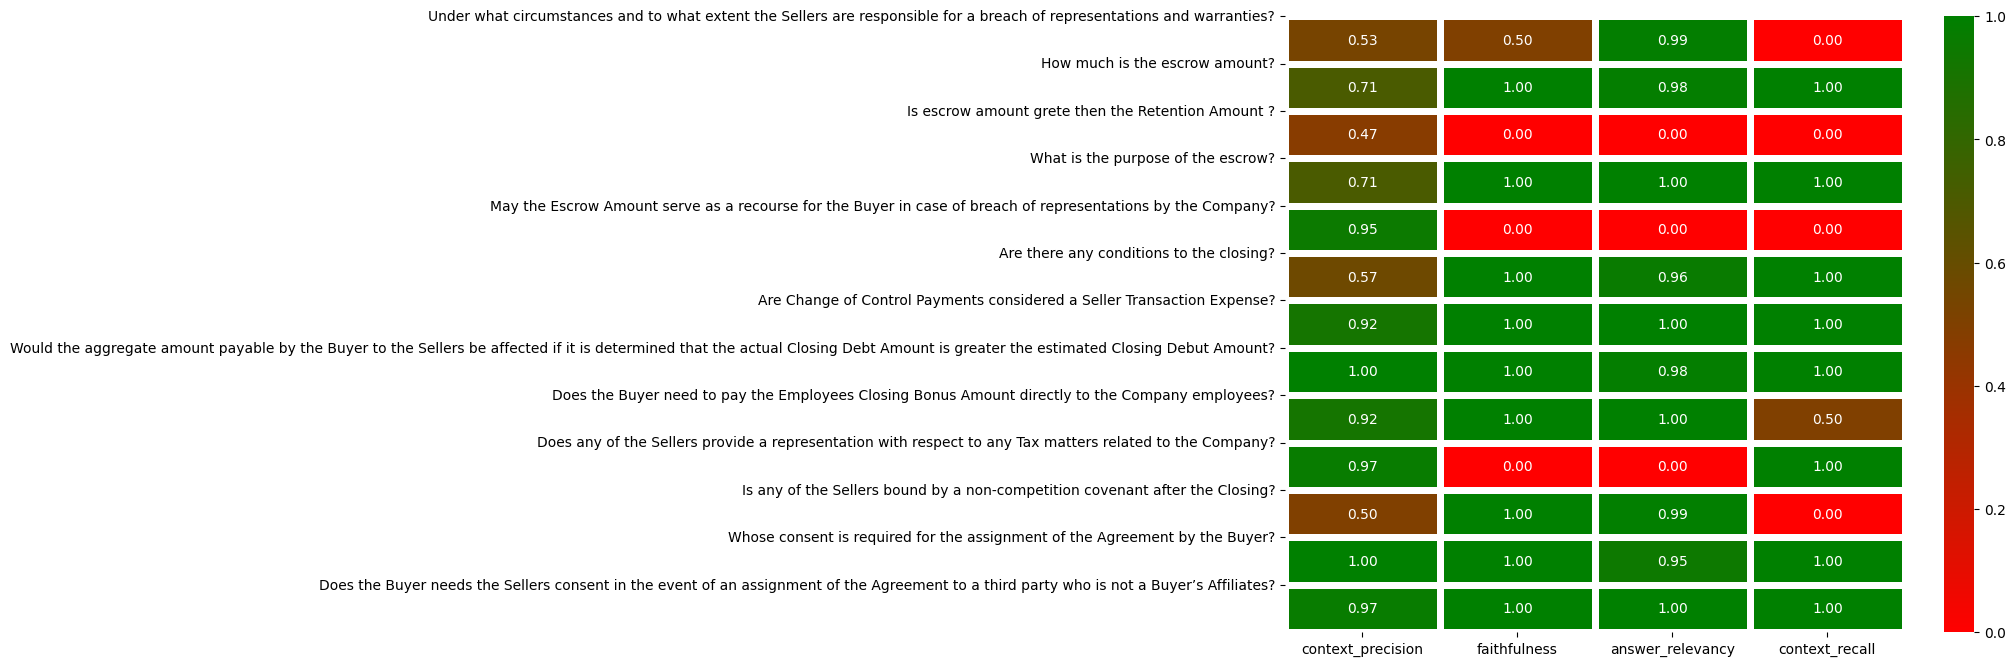

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
heatmap_data = evaluation_result[['context_precision', 'faithfulness', 'answer_relevancy', 'context_recall']]
cmap = LinearSegmentedColormap.from_list('green_red', ['red','green'])
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', linewidths=5, cmap=cmap)
plt.yticks(ticks=range(len(evaluation_result['question'])), labels=evaluation_result['question'], rotation=0)
plt.show

In [46]:
questions = test_data['question'].to_list()
ground_truth = test_data['ground_truth'].to_list()

In [51]:
questions

['What is the ownership status of the Equity Interests held by the Seller?',
 'What is the significance of the "Matters of Construction" in this Agreement?',
 'What is the definition of "Liability" in the given context?',
 'What is the definition and purpose of supplemental retirement in the given context?',
 'What is the significance of the Organizational Documents in relation to the Contemplated Transactions?',
 "What are the Buyer's obligations for the Closing Date regarding indemnification provisions and insurance policies for directors and officers?",
 "What remedies can the Buyer seek for Seller's covenant breaches in Section 6.08 and what are the Buyer's obligations for directors' and officers' liability insurance?",
 'What is the status of Assets in relation to Encumbrances and the ownership status of Company Intellectual Property?',
 'What are the consequences and provisions in Section 6.09 for a breach by the Seller in Section 6.08?']

In [50]:
from datasets import Dataset
data = {'question':[], 'answer':[], 'contexts':[], 'ground_truth':ground_truth}
for query in questions:
    data['question'].append(query)
    # Generate the chatbot response
    data['answer'].append(multi_query.multi_query(vector,query))
    data['contexts'].append([doc.page_content for doc in retriever.get_relevant_documents(query)])
    dataset = Dataset.from_dict(data)

ArrowInvalid: Column 3 named ground_truth expected length 1 but got length 9